#### Домашнее задание - получите значения AUC для различных моделей и их параметров.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Подготовка датасета

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
X, y = df[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']], df['income']

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
X = pd.get_dummies(X)

In [9]:
del X['fnlwgt']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_text = sc.transform(X_test)

## Обучаем и сравниваем показатель AUC в моделях

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline

### LogisticRegression

In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.2333310584863168

In [16]:
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1.0, 10.0]

In [17]:
params = []
lines = []
scores = []

for p in penalty:
    for c in C:
        lr = LogisticRegression(penalty=p, C=c)
        lr.fit(X_train, y_train)
        
        probas = lr.predict_proba(X_test)[:, 1]
        
        params.append((p, c))
        scores.append(roc_auc_score(y_test, probas))
        lines.append(roc_curve(y_test, probas))

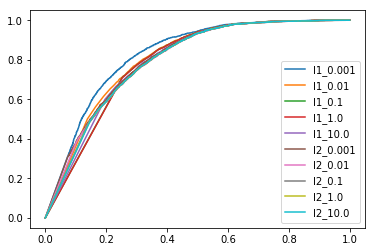

In [18]:
for i in range((len(params))):
    plt.plot(lines[i][0], lines[i][1], label='{}_{}'.format(params[i][0], params[i][1]))

plt.legend()
plt.show()

In [19]:
for i in range((len(params))):
    print('{}_{}: {}'.format(params[i][0], params[i][1], scores[i]))

l1_0.001: 0.828528584125729
l1_0.01: 0.8075106838113084
l1_0.1: 0.7913459240825718
l1_1.0: 0.7910936007106243
l1_10.0: 0.79415569186488
l2_0.001: 0.8021383035652592
l2_0.01: 0.7968631009476257
l2_0.1: 0.7947179552441891
l2_1.0: 0.7946138521638887
l2_10.0: 0.7944952212559511


### KNN

In [54]:
kn = KNeighborsClassifier(n_jobs= -1)
kn.fit(X_train, y_train)
kn.score(X_test, y_test)

0.7837302941377192

In [57]:
pr = kn.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, pr)

0.5665273618095071

In [42]:
kn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')>

In [37]:
n_neighbors = [3, 4, 5, 6, 7]
weights = ['uniform', 'distance']

In [44]:
params = []
lines = []
scores = []

for n_neighbor in n_neighbors:
    for weight in weights:
        kn = KNeighborsClassifier(n_neighbors = n_neighbor, weights = weight, n_jobs= -1)
        kn.fit(X_train, y_train)
        
        probas = kn.predict_proba(X_test)[:, 1]
        
        params.append((n_neighbor, weight))
        scores.append(roc_auc_score(y_test, probas))
        lines.append(roc_curve(y_test, probas))

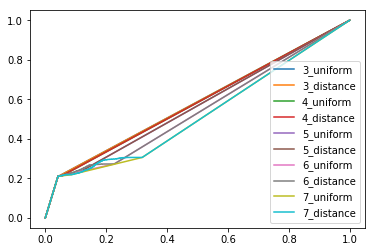

In [45]:
for i in range((len(params))):
    plt.plot(lines[i][0], lines[i][1], label='{}_{}'.format(params[i][0], params[i][1]))

plt.legend()
plt.show()

In [46]:
for i in range((len(params))):
    print('{}_{}: {}'.format(params[i][0], params[i][1], scores[i]))

3_uniform: 0.5838118968120166
3_distance: 0.583812183202884
4_uniform: 0.5803653389360413
4_distance: 0.5803662892330104
5_uniform: 0.5665273618095071
5_distance: 0.5665911618841041
6_uniform: 0.5412665287234679
6_distance: 0.5429423188485337
7_uniform: 0.5199267771451548
7_distance: 0.5236688513429882


### DecisionTreeClassifier

In [48]:
tr = DecisionTreeClassifier()
tr.fit(X_train, y_train)
tr.score(X_test, y_test)

0.2876544052412475

In [49]:
max_depth = [1, 2, 3, 4, 5]
max_features = [3, 4, 5, 6]

In [50]:
params = []
lines = []
scores = []

for i in max_depth:
    for j in max_features:
        tr = DecisionTreeClassifier(max_depth = i, max_features = j)
        tr.fit(X_train, y_train)
        
        probas = tr.predict_proba(X_test)[:, 1]
        
        params.append((i, j))
        lines.append(roc_curve(y_test, probas))
        scores.append(roc_auc_score(y_test, probas))

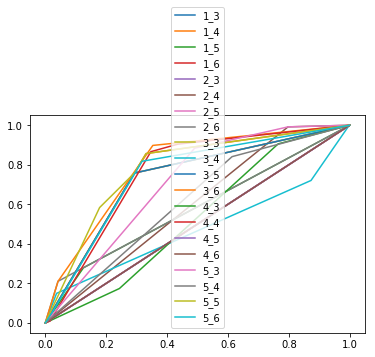

In [52]:
for i in range((len(params))):
    plt.plot(lines[i][0], lines[i][1], label = '{}_{}'.format(params[i][0], params[i][1]))
    
plt.legend()
plt.show()

In [53]:
for i in range((len(params))):
    print('{}_{}: {}'.format(params[i][0], params[i][1], scores[i]))

1_3: 0.5
1_4: 0.7628618268727633
1_5: 0.5768475738762164
1_6: 0.5
2_3: 0.732627725249932
2_4: 0.5971603538395617
2_5: 0.5
2_6: 0.5843753057547953
3_3: 0.732627725249932
3_4: 0.4759446771992201
3_5: 0.732627725249932
3_6: 0.7907277233597523
4_3: 0.5265979269571028
4_4: 0.7609901193588615
4_5: 0.5
4_6: 0.5
5_3: 0.7063312116630026
5_4: 0.6137099187519524
5_5: 0.7806616311167948
5_6: 0.749053321970038


### SVC ( на большом кол-ве комбинаций считалась очень долго, для примера два значения использовал)

In [30]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7666689415136833

In [31]:
C = [0.1, 1.0]

In [32]:
params = []
lines = []
scores = []

for j in C:
    svc = SVC(C = j, probability=True)
    svc.fit(X_train, y_train)

    probas = svc.predict_proba(X_test)[:, 1]

    params.append((j))
    lines.append(roc_curve(y_test, probas))
    scores.append(roc_auc_score(y_test, probas))

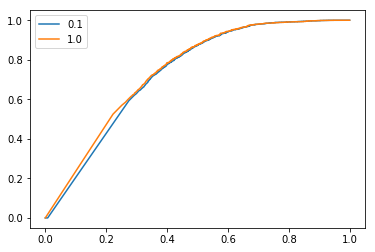

In [34]:
for i in range((len(params))):
    plt.plot(lines[i][0], lines[i][1], label = '{}'.format(params[i]))
    
plt.legend()
plt.show()

In [36]:
for i in range((len(params))):
    print('{}: {}'.format(params[i], scores[i]))

0.1: 0.7331657886009457
1.0: 0.7440843753317903
